1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
df =  dataframe[~(dataframe['clase']==2)]
df.head()

,duracion,paginas,acciones,valor,clase
17,21.0,2,4,12,1
18,33.0,2,8,48,1
19,49.0,2,8,32,1
20,74.0,2,6,18,1
21,93.0,2,12,96,1


In [5]:
print(df.groupby('clase').size())

clase
0    86
1    40
dtype: int64


## Visualizamos los datos

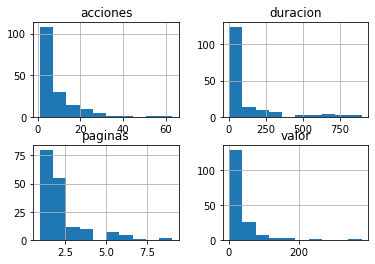

In [4]:
dataframe.drop(['clase'],1).hist() # con drop estoy borrando la columna clase pero ademas con el 1 le estoy indicando columna tb. Elimino clase pq será mi target
plt.show()

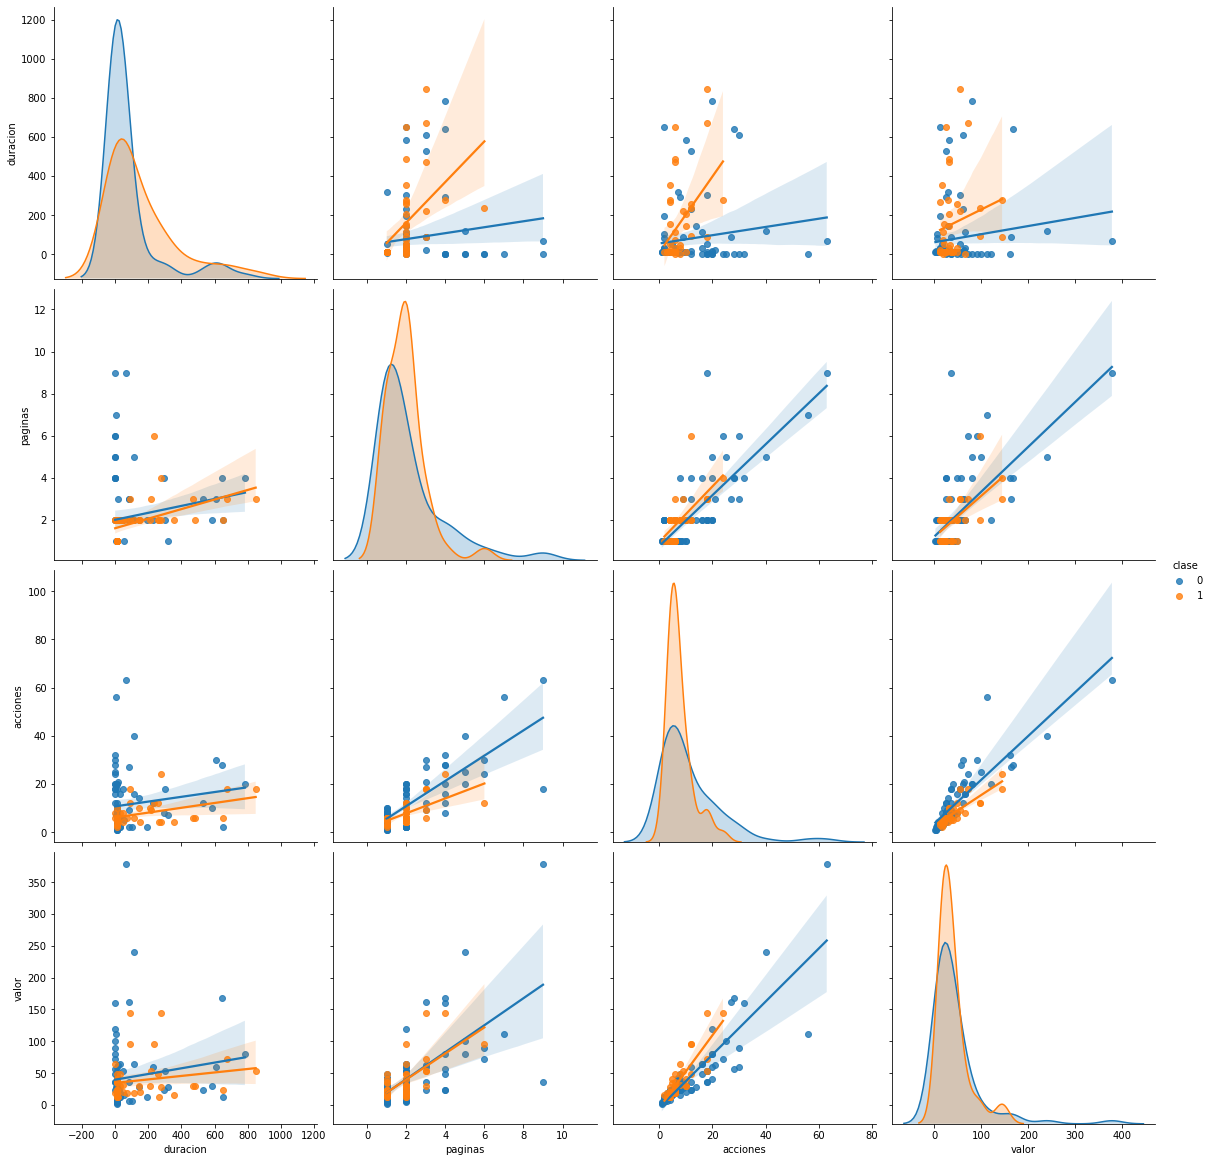

In [5]:
sb.pairplot(df.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal de nuestros datos lo obtengo con kind = 'reg'
#hue indicas que relaciona la columna clase con todas las demas a la hora de graficarlo

## Creamos el modelo

In [8]:
#elimino clase del df pq es el target
X = np.array(df.drop(['clase'], 1))
y = np.array(df['clase'])
X.shape


(126, 4)

In [9]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [10]:
predictions = model.predict(X)
print(predictions)

[0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
model.score(X,y)

0.7380952380952381

# Adicional: Validación del Modelo

In [13]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [14]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.710000 (0.181384)


In [15]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.7307692307692307


## Reporte de Resultados

In [16]:
print(confusion_matrix(Y_test, predictions))

[[17  2]
 [ 5  2]]


¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

No se mejora la precisión con solo dos clases, ya que